# Importation des packages

In [1]:
# Importation des bibliothèques nécessaires

#!pip install pandas numpy matplotlib scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# Importation des données
data = pd.read_csv("Boston_Housing.csv",index_col=0)



In [5]:
# Affiche des informations sur le jeu de données

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:
# Affiche les premières lignes du jeu de données
data.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Description des variables 
| Variable | Description |
| --- | --- |
| CRIM | Taux de criminalité par habitant dans la zone (ville.). |
| ZN | Proportion de terrains résidentiels zonés pour les lots de plus de 25 000 pieds carrés. |
| INDUS | Proportion d'acres commerciaux non commerçants par ville. |
| CHAS | Variable binaire indiquant si le terrain borde la rivière Charles (1 si oui, 0 sinon). |
| NOX | Concentration de dioxyde d'azote (parties par 10 millions). |
| RM | Nombre moyen de pièces par logement. |
| AGE | Proportion de logements occupés par leur propriétaire construits avant 1940. |
| DIS | Distance pondérée par les centres d'emploi de Boston. |
| RAD | Indice d'accessibilité aux autoroutes radiales. |
| TAX | Taux d'impôt foncier plein par tranche de 10 000 dollars. |
| PTRATIO | Ratio élèves/enseignant par ville. |
| B | 1000(Bk - 0.63)^2 où Bk est la proportion de personnes d'origine afro-américaine par ville. |
| LSTAT | Pourcentage de statut inférieur de la population. |
| MEDV | Valeur médiane des logements occupés par leur propriétaire en milliers de dollars. |




In [6]:

# Renommage des colonnes 
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]



# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
#Valeurs manquantes

data.isnull().sum()

Taux_criminalite              0
Prop_terrains_resid           0
Prop_acres_indus              0
Bordure_riviere               0
Concentration_NO2             0
Nb_pieces_logement            0
Prop_log_construits_av1940    0
Dist_ponderees_emploi         0
Accessibilite_autoroute       0
Taux_impot_foncier            0
Ratio_eleve_prof              0
Prop_noirs_ville              0
Pourcentage_pop_inf           0
Valeur_med_logement           0
dtype: int64

Le résultat affiché indique qu'il n'y a aucune valeur manquante dans aucune des colonnes du jeu de données. Chaque colonne a un total de 0 valeurs manquantes.

Cela suggère que le jeu de données est complet, sans aucune donnée manquante. 


## Analyse sur la base globale

In [8]:
# Résumé statistique des variables
data.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Exemple d'analyse
Le jeu de données contient 506 observations pour la variable "Taux_criminalite". 

l'analyse des statistiques de la variable "Taux_criminalite" suggère une certaine variabilité dans les taux de criminalité observés, allant de valeurs très faibles à des valeurs relativement élevées.

La moyenne de cette variable est d'environ 3.6, ce qui suggère un taux de criminalité moyen relativement modéré dans l'échantillon étudié.

Cependant, il est important de noter que la dispersion des données est assez élevée, comme en témoigne l'écart type de près de 8.6. Cela indique une grande variabilité dans les taux de criminalité observés, avec des valeurs qui peuvent s'étendre sur une large gamme.

La valeur minimale observée pour "Taux_criminalite" est d'environ 0.006320, tandis que la valeur maximale est d'environ 88.976200. Ces valeurs extrêmes suggèrent la présence de valeurs aberrantes ou de situations exceptionnelles dans les données. Il est important de les prendre en compte lors de l'analyse afin de comprendre les facteurs qui pourraient influencer ces taux de criminalité élevés.

En examinant les quartiles, on constate que 25% des observations ont un taux de criminalité inférieur à environ 0.082045, tandis que 50% des observations se situent en dessous de la médiane d'environ 0.256510. Le troisième quartile est d'environ 3.677083, ce qui signifie que 75% des observations ont un taux de criminalité inférieur à cette valeur.




#### remarques 
on considère généralement qu'une dispersion est élevée lorsque l'écart-type dépasse 1,5 fois la moyenne ou que le coefficient de variation est supérieur à 50%. Mais cela dépend aussi du contexte et de l'utilisation prévue des données.

Écart-type (σ) :
Dispersion faible : σ < 0,5 fois la moyenne
Dispersion moyenne : 0,5 fois la moyenne ≤ σ ≤ 1,5 fois la moyenne
Dispersion élevée : σ > 1,5 fois la moyenne

Coefficient de variation (CV = σ/moyenne) :
Dispersion faible : CV < 0,2 (20%)
Dispersion moyenne : 0,2 ≤ CV ≤ 0,5
Dispersion élevée : CV > 0,5 (50%)

Étendue (différence entre la valeur max et la valeur min) :
Plus l'étendue est grande par rapport à la moyenne, plus la dispersion est élevée.
 /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

Avoir une grande variabilité dans un jeu de données signifie que les valeurs observées présentent une dispersion importante autour de la valeur moyenne.

Quelques éléments clés sur la signification d'une grande variabilité :

Écart important par rapport à la moyenne : Les valeurs individuelles s'écartent de manière significative de la valeur moyenne du jeu de données.

Forte hétérogénéité : Les données ne sont pas concentrées autour d'une valeur centrale, mais sont réparties sur une large plage de valeurs.

Manque d'homogénéité : Le jeu de données n'est pas compact et cohérent, il présente une forte dispersion.

Difficulté d'interprétation : Avec une grande variabilité, il devient plus difficile d'identifier des tendances claires et de tirer des conclusions robustes à partir des données.

Sensibilité aux valeurs extrêmes : Quelques valeurs très élevées ou très basses peuvent avoir un impact important sur les statistiques descriptives comme la moyenne ou l'écart-type.


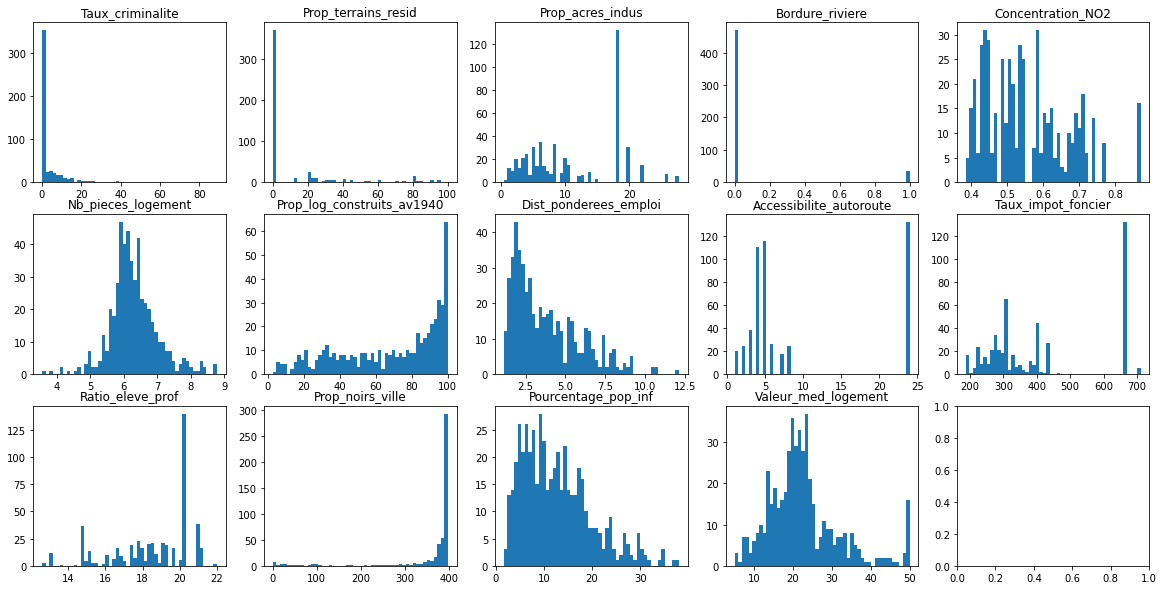

In [8]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=50)
    axs[i].set_title(column)

plt.show()

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorama

from colorama import init, Fore, Back, Style

# Initialisation de colorama
init()

# Analyser la forme de distribution pour chaque variable
for column in data.columns:
    print(f"Variable: {Fore.BLUE}{Style.BRIGHT}{column}{Style.RESET_ALL}")

    # Calcul de la symétrie et de l'aplatissement
    skewness = data[column].skew()
    kurtosis = data[column].kurt()

    # Déterminer la forme de distribution
    if abs(skewness) < 0.5:
        print(f"Forme de distribution : {Fore.GREEN}Symétrique{Style.RESET_ALL}")
    else:
        if skewness > 0:
            print(f"Forme de distribution : Asymétrique, avec une queue de distribution plus longue à droite {Fore.YELLOW}(asymétrie positive){Style.RESET_ALL}")
        else:
            print(f"Forme de distribution : Asymétrique, avec une queue de distribution plus longue à gauche {Fore.YELLOW}(asymétrie négative){Style.RESET_ALL}")

    # Vérifier si la distribution est multimodale
    modes = data[column].mode()
    if len(modes) > 1:
        print(f"Forme de distribution : {Fore.MAGENTA}Multimodale{Style.RESET_ALL}")
    else:
        # Si unimodale, analyser le kurtosis
        if kurtosis < 3:
            print(f"Forme de distribution : Unimodale et plus plate que la normale {Fore.BLUE}(kurtosis négatif){Style.RESET_ALL}")
        elif kurtosis > 3:
            print(f"Forme de distribution : Unimodale et plus pointue que la normale {Fore.BLUE}(kurtosis positif){Style.RESET_ALL}")
        else:
            print(f"Forme de distribution : Unimodale et similaire à la normale {Fore.BLUE}(kurtosis neutre){Style.RESET_ALL}")

    print()

Variable: Taux_criminalite
Forme de distribution : Asymétrique, avec une queue de distribution plus longue à droite (asymétrie positive)
Forme de distribution : Multimodale

Variable: Prop_terrains_resid
Forme de distribution : Asymétrique, avec une queue de distribution plus longue à droite (asymétrie positive)
Forme de distribution : Unimodale et plus pointue que la normale (kurtosis positif)

Variable: Prop_acres_indus
Forme de distribution : Symétrique
Forme de distribution : Unimodale et plus plate que la normale (kurtosis négatif)

Variable: Bordure_riviere
Forme de distribution : Asymétrique, avec une queue de distribution plus longue à droite (asymétrie positive)
Forme de distribution : Unimodale et plus pointue que la normale (kurtosis positif)

Variable: Concentration_NO2
Forme de distribution : Asymétrique, avec une queue de distribution plus longue à droite (asymétrie positive)
Forme de distribution : Unimodale et plus plate que la normale (kurtosis négatif)

Variable: Nb_p

##### Remarques 

Voici comment interpréter les résultats obtenus avec ce code :

1. **Forme de distribution : Symétrique**
   - Lorsque la valeur absolue du skewness est inférieure à 0.5, cela indique que la distribution est globalement symétrique.
   - Une distribution symétrique signifie que la queue de distribution à gauche et à droite de la moyenne sont à peu près équivalentes. Cela indique que les données ne sont pas concentrées de manière disproportionnée d'un côté ou de l'autre de la moyenne.

2. **Forme de distribution : Asymétrique**
   - Lorsque la valeur absolue du skewness est supérieure ou égale à 0.5, cela indique que la distribution est asymétrique.
   - Si le skewness est positif, cela signifie que la queue de distribution est plus longue du côté droit. Autrement dit, il y a plus de valeurs élevées que de valeurs faibles dans les données.
   - Si le skewness est négatif, cela signifie que la queue de distribution est plus longue du côté gauche. Autrement dit, il y a plus de valeurs faibles que de valeurs élevées dans les données.

3. **Forme de distribution : Unimodale**
   - Lorsque la valeur du kurtosis est inférieure à 3, cela indique que la distribution est unimodale, c'est-à-dire qu'elle a un seul mode (pic).
   - Une distribution unimodale signifie que les données se concentrent principalement autour d'une seule valeur centrale.

4. **Forme de distribution : Multimodale**
   - Lorsque la valeur du kurtosis est supérieure ou égale à 3, cela indique que la distribution est multimodale, c'est-à-dire qu'elle a plusieurs modes (pics).
   - Une distribution multimodale signifie que les données se concentrent autour de plusieurs valeurs centrales, ce qui peut indiquer la présence de sous-groupes distincts dans les données.



##### Remarques : (asymetrie)

Les distributions asymétriques posent plusieurs problèmes dans l'analyse de données :

1. **Interprétation des statistiques descriptives :**
   - La moyenne et l'écart-type sont plus difficiles à interpréter dans le cas d'une distribution asymétrique, car ils ne reflètent pas fidèlement la forme de la distribution.
   - Les mesures de tendance centrale (médiane, mode) sont généralement plus pertinentes que la moyenne pour résumer les données.

2. **Modélisation statistique :**
   - De nombreux modèles statistiques, comme la régression linéaire, font l'hypothèse de normalité des résidus. Une distribution asymétrique des résidus peut violer cette hypothèse et rendre les estimations moins fiables.
   - Des transformations des données (log, racine carrée, etc.) peuvent être nécessaires pour rendre la distribution plus symétrique et satisfaire les hypothèses des modèles.

3. **Détection des valeurs aberrantes :**
   - Dans une distribution symétrique, les valeurs aberrantes se situent généralement à plus de 3 écarts-types de la moyenne.
   - Dans une distribution asymétrique, cette règle n'est plus valable, et d'autres méthodes sont nécessaires pour identifier les valeurs aberrantes.

4. **Généralisations et inférences :**
   - Les tests statistiques paramétriques, comme le test-t ou l'ANOVA, font l'hypothèse de normalité des données. Une distribution asymétrique peut affecter la validité de ces tests.
   - Des tests non paramétriques, comme le test de Wilcoxon ou le test de Kruskal-Wallis, peuvent être plus appropriés dans le cas de distributions asymétriques.

5. **Visualisation des données :**
   - Les histogrammes et les diagrammes en boîte à moustaches permettent de visualiser facilement la forme de la distribution. Cependant, ces représentations peuvent être moins informatives pour les distributions asymétriques.
   - D'autres types de graphiques, comme les diagrammes de densité ou les diagrammes en violon, peuvent être plus adaptés pour représenter les distributions asymétriques.



## Distribution des variables

var_numerique : boxplot et histogramme

var_cate : diagramme en barre


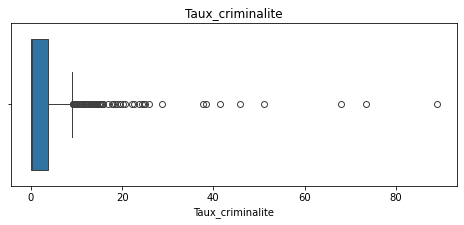

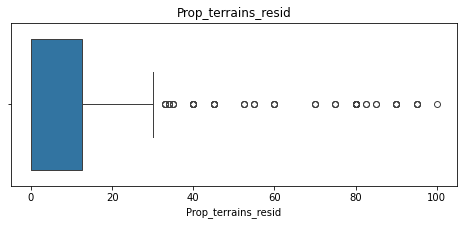

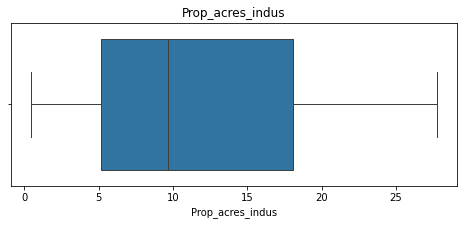

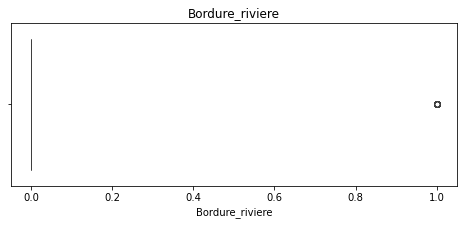

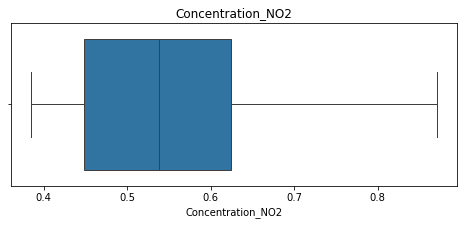

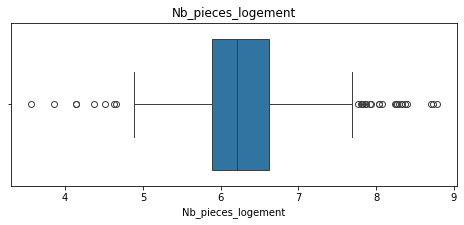

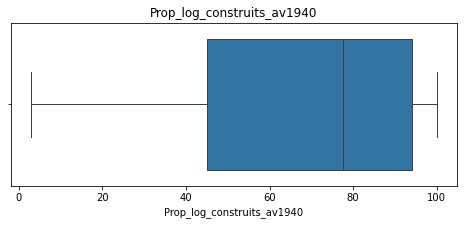

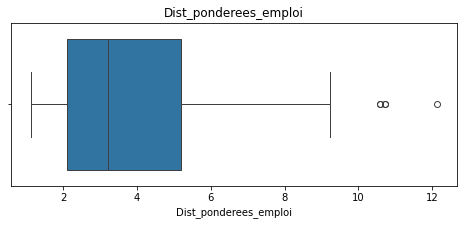

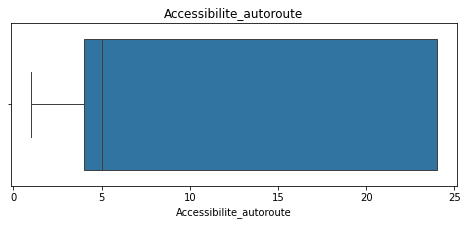

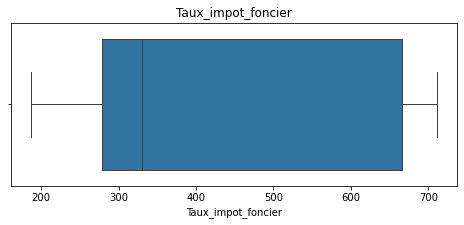

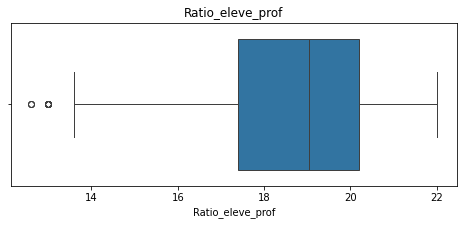

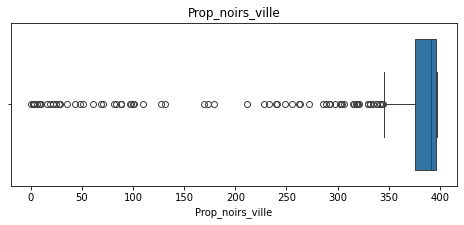

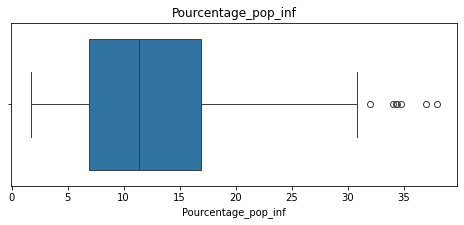

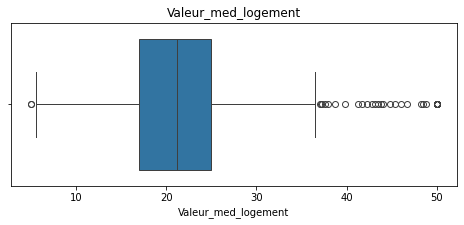

In [15]:
import seaborn as sns

# Tracé des boxplots pour chaque variable
for column in data.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=data[column], ax=ax)
    plt.title(column)
    plt.show()

## Corrélation entre les variables

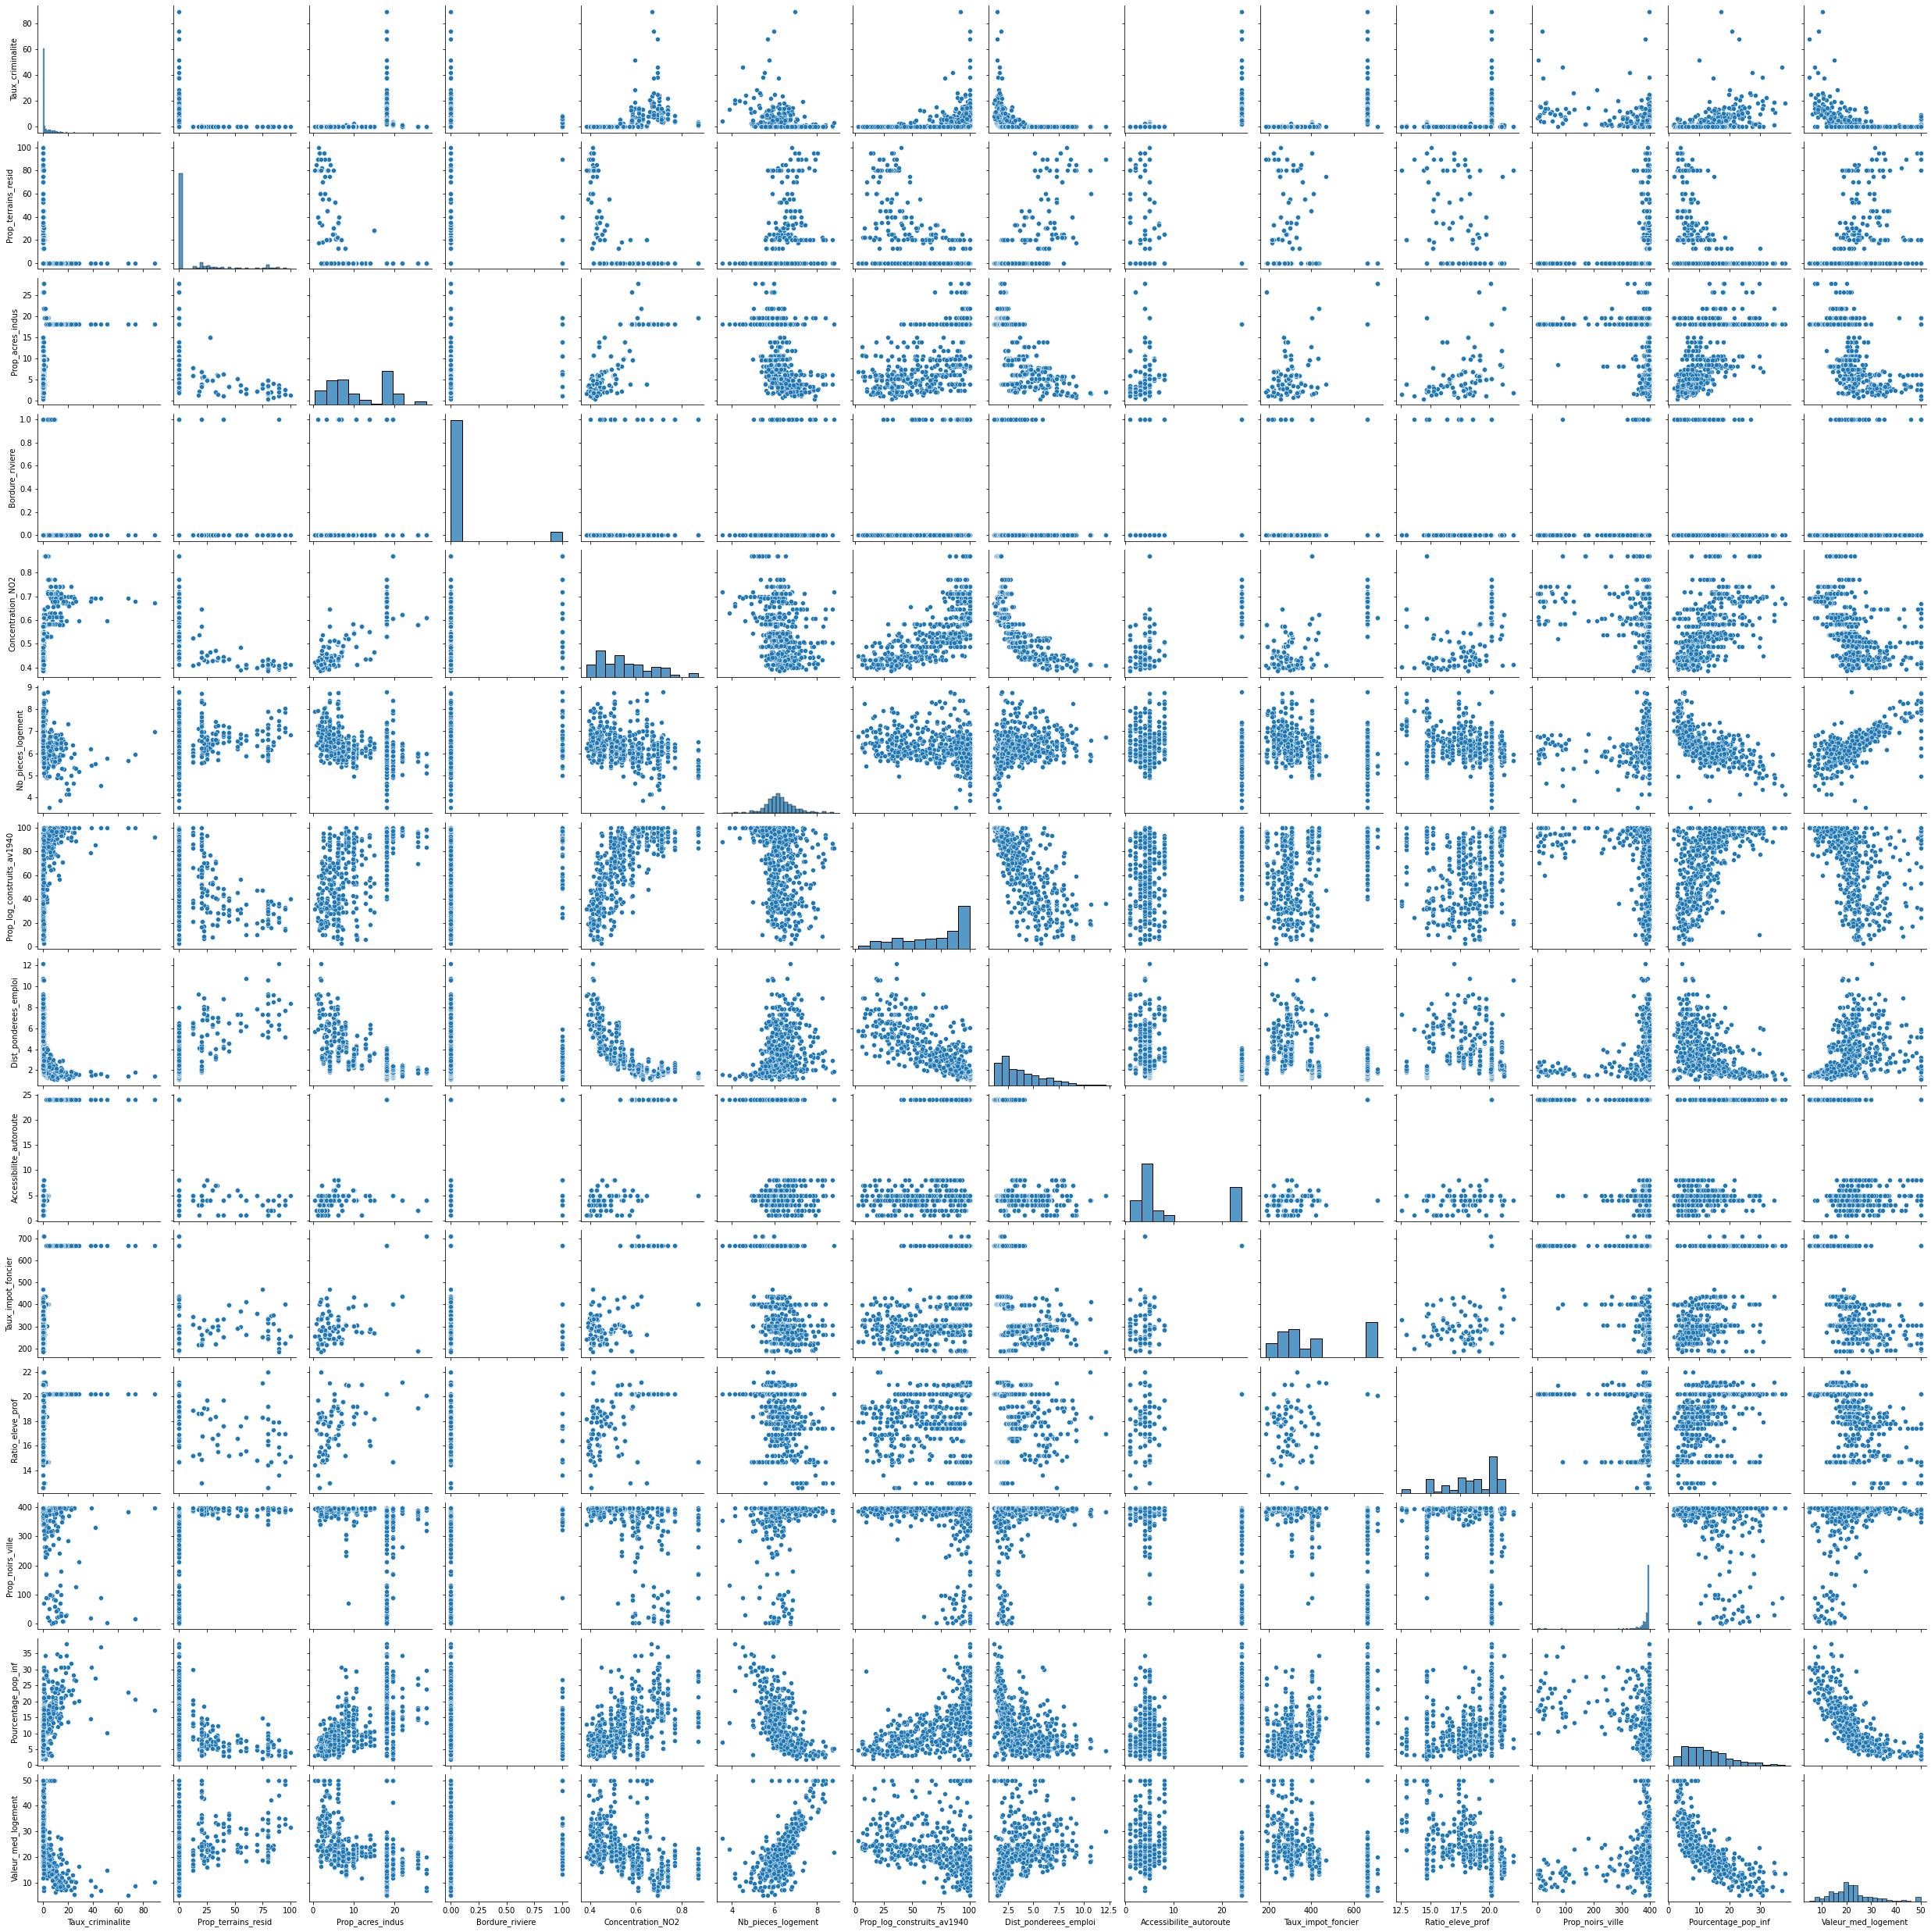

In [16]:
sns.pairplot(data=data)

In [19]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()


In [35]:
## si on a aussi des var cate
"""
# Encoder les variables catégorielles en variables numériques
for col in data.select_dtypes('object').columns:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

"""


"\n# Encoder les variables catégorielles en variables numériques\nfor col in data.select_dtypes('object').columns:\n    data[col] = data[col].astype('category')\n    data[col] = data[col].cat.codes\n\n"

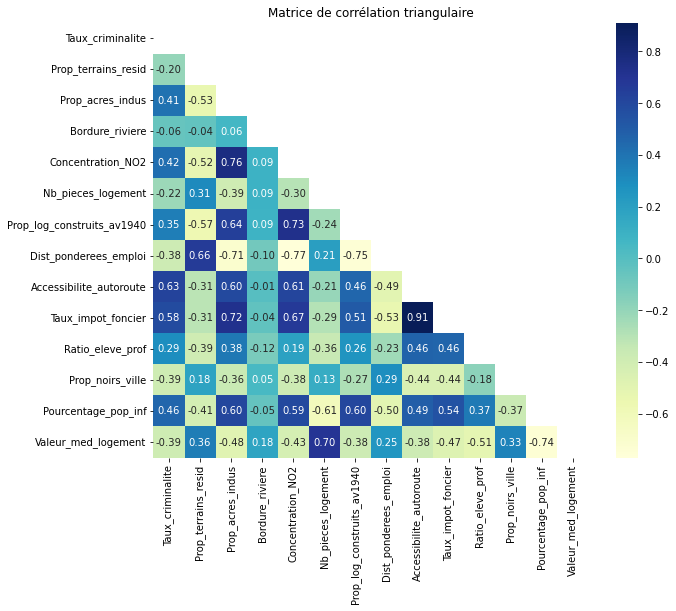

In [20]:
# Masquer les valeurs au-dessus de la diagonale principale

mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
corr_matrix_masked = corr_matrix.mask(mask)
#transposée
corr_matrix_masked=corr_matrix_masked.T

# Afficher la matrice de corrélation de manière triangulaire
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_masked, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)
plt.title("Matrice de corrélation triangulaire")
plt.show()

In [33]:
from colorama import Fore, Style

# Affichage des variables fortement corrélées
# Parcourez chaque paire de variables
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        # Vérifiez si la corrélation est supérieure à 0,6
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            # Affichez la paire de variables
            print(f"Avec une corrélation de {Fore.RED}{abs(corr_matrix.iloc[i, j]):.3f}{Style.RESET_ALL}, les variables {Fore.BLUE}{corr_matrix.columns[i]}{Style.RESET_ALL} et {Fore.BLUE}{corr_matrix.columns[j]}{Style.RESET_ALL} sont fortement corrélées")

Avec une corrélation de 0.626, les variables Taux_criminalite et Accessibilite_autoroute sont fortement corrélées
Avec une corrélation de 0.664, les variables Prop_terrains_resid et Dist_ponderees_emploi sont fortement corrélées
Avec une corrélation de 0.764, les variables Prop_acres_indus et Concentration_NO2 sont fortement corrélées
Avec une corrélation de 0.645, les variables Prop_acres_indus et Prop_log_construits_av1940 sont fortement corrélées
Avec une corrélation de 0.708, les variables Prop_acres_indus et Dist_ponderees_emploi sont fortement corrélées
Avec une corrélation de 0.721, les variables Prop_acres_indus et Taux_impot_foncier sont fortement corrélées
Avec une corrélation de 0.604, les variables Prop_acres_indus et Pourcentage_pop_inf sont fortement corrélées
Avec une corrélation de 0.731, les variables Concentration_NO2 et Prop_log_construits_av1940 sont fortement corrélées
Avec une corrélation de 0.769, les variables Concentration_NO2 et Dist_ponderees_emploi sont fort

In [42]:

def extract_correlated_pairs(dataframe, corr_threshold):
    # Calculez la matrice de corrélation
    corr_matrix = dataframe.corr()

    # Extraction des couples de variables ayant une corrélation supérieure à corr_threshold
    corr_pairs = {}

    for col in corr_matrix.columns:
        corr_pairs[col] = []
        corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
        for pair in corr_values:
            if pair != col:
                corr_pairs[col].append(pair)

    # Affichage des couples de variables ayant une corrélation supérieure au seuil
    print(f"Couples de variables ayant une corrélation supérieure à {corr_threshold} :\n")
    for col, pairs in corr_pairs.items():
        if len(pairs) > 0:
            for pair in pairs:
                print(col, "-", pair)
                
                

In [43]:
corr_pair_threshold = 0.8
extract_correlated_pairs(data,corr_pair_threshold)


Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute


## Corrélation entre les variables et la variables d'interêt

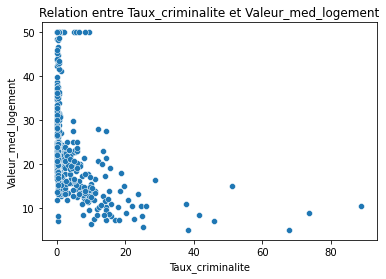

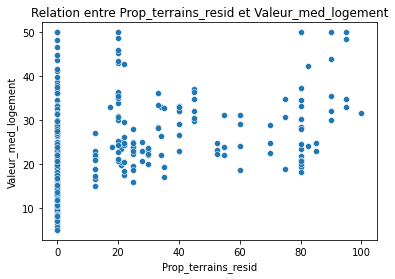

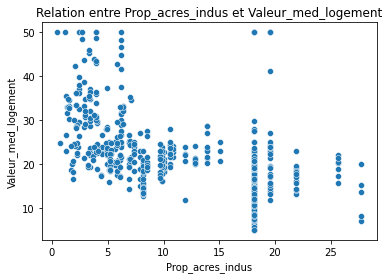

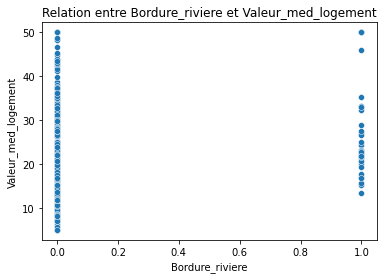

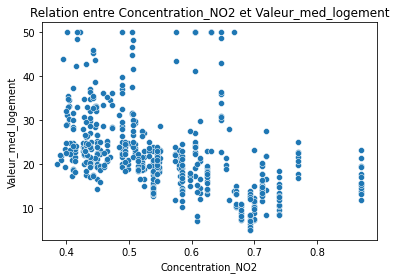

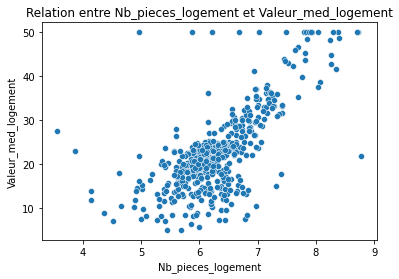

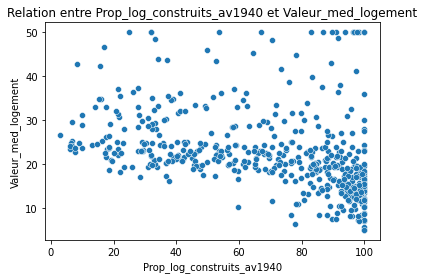

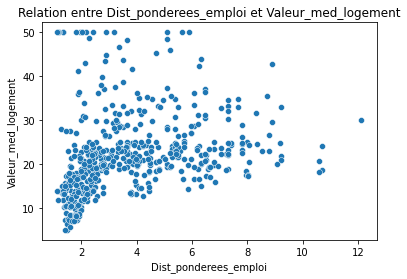

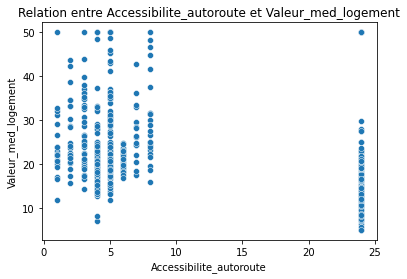

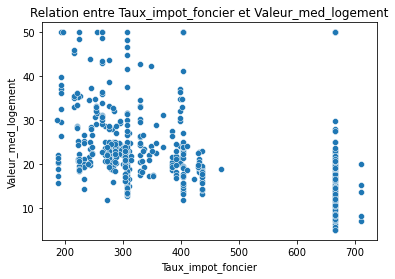

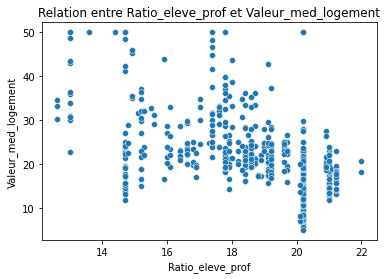

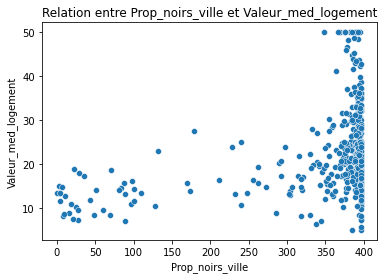

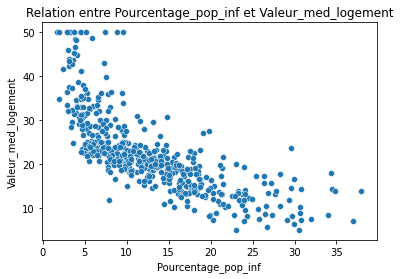

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

var_inte = "Valeur_med_logement"

# Extraction des colonnes de variables explicatives
X = data.drop(var_inte, axis=1)

# Boucle sur les variables explicatives
for col in X.columns:
    # Si la variable est catégorielle
    if X[col].dtype == 'object':
        # Créer un graphique de type countplot
        sns.countplot(x=X[col], hue=data[var_inte])
        plt.title(f"Distribution de {col} en fonction de {var_inte}")
        plt.show()
    # Si la variable est numérique    
    else:
        # Créer un graphique de type scatterplot
        sns.scatterplot(x=X[col], y=data[var_inte])
        plt.title(f"Relation entre {col} et {var_inte}")
        plt.show()

In [36]:
def extract_correlated_variables(dataframe, target_variable, corr_threshold):
    # Calculez la matrice de corrélation
    corr_matrix = dataframe.corr()

    # Extraction des variables ayant une corrélation supérieure à corr_threshold avec la variable d'intérêt
    corr_vars = corr_matrix[abs(corr_matrix[target_variable]) > corr_threshold].index.tolist()

    # Affichage des variables ayant une corrélation supérieure au seuil avec la variable d'intérêt
    print(f"Variables ayant une corrélation supérieure à {corr_threshold} avec la variable d'intérêt ({target_variable}) :\n")
    print(corr_vars)


In [49]:
def correlated_variables(dataframe, target_variable, corr_threshold):
    """
    Trouve les variables corrélées à une variable cible avec un seuil de corrélation donné.
    
    Args:
    dataframe (pandas.DataFrame): Le dataframe contenant les données.
    target_variable (str): Le nom de la variable cible.
    corr_threshold (float): Le seuil de corrélation minimum (entre 0 et 1).
    
    Returns:
    list: Les variables corrélées à la variable cible.
    """
    # Calculez la matrice de corrélation
    corr_matrix = dataframe.corr()

    # Extraction des variables ayant une corrélation supérieure à corr_threshold avec la variable d'intérêt
    corr_vars = corr_matrix[abs(corr_matrix[target_variable]) > corr_threshold].index.tolist()

    # Supprimer la variable cible de la liste
    corr_vars.remove(target_variable)

    return corr_vars

In [50]:
df=data 
target_variable = "Valeur_med_logement"
corr_threshold = 0.5

extract_correlated_variables(df, target_variable, corr_threshold)


Variables ayant une corrélation supérieure à 0.5 avec la variable d'intérêt (Valeur_med_logement) :

['Nb_pieces_logement', 'Ratio_eleve_prof', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [51]:
variable_correlées = correlated_variables(df, target_variable, corr_threshold)
variable_correlées



['Nb_pieces_logement', 'Ratio_eleve_prof', 'Pourcentage_pop_inf']

In [52]:
# Calcul de la matrice de corrélation des var explicatives
corr_matrix_var_expli = data[variable_correlées].corr()


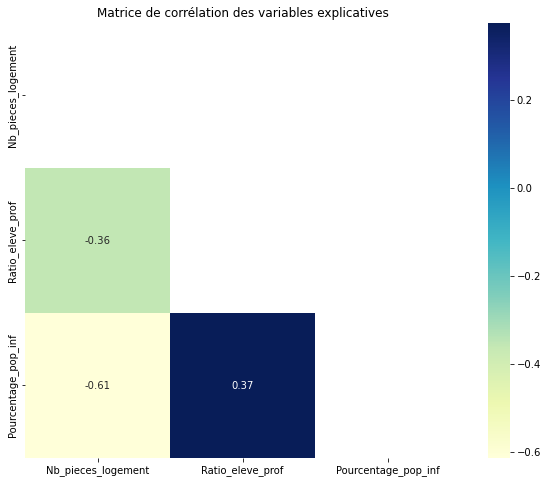

In [53]:
# Masquer les valeurs au-dessus de la diagonale principale

mask1 = np.tril(np.ones_like(corr_matrix_var_expli, dtype=bool))
corr_matrix_var_expli_masked = corr_matrix_var_expli.mask(mask1)
#transposée
corr_matrix_var_expli_masked=corr_matrix_var_expli_masked.T

# Afficher la matrice de corrélation de manière triangulaire
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_var_expli_masked, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)
plt.title("Matrice de corrélation des variables explicatives")
plt.show()

# Division en Train et en Test

In [54]:

# Diviser les données en ensembles d'apprentissage et de test

train, test = train_test_split(data, test_size=0.2, random_state=42)



## Sélection des features sur la base train

In [55]:
# Résumé statistique des variables
train.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


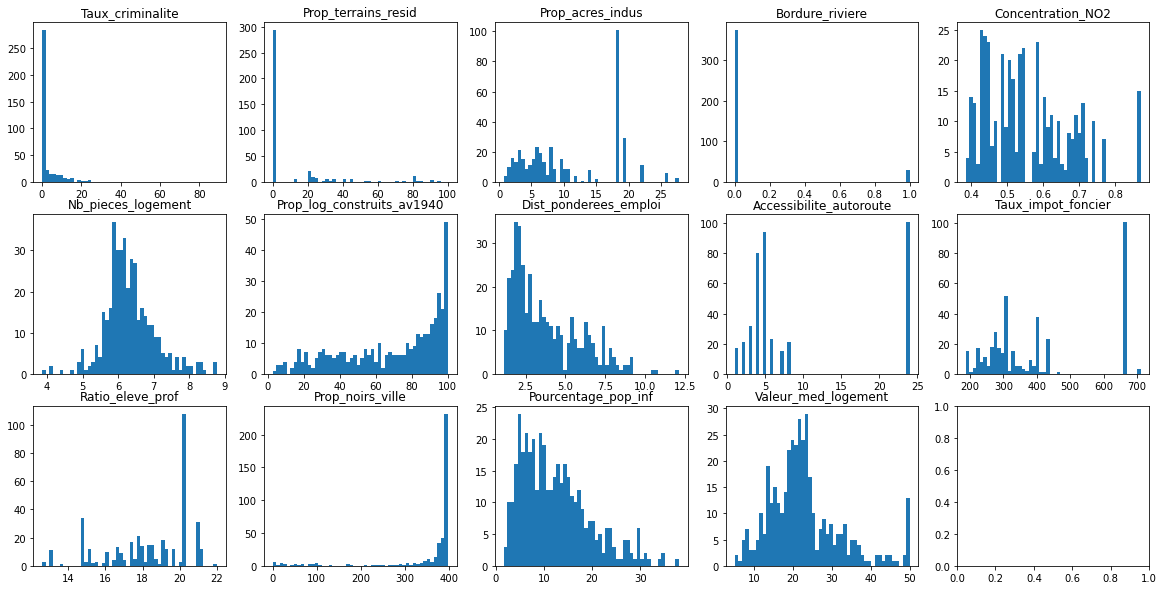

In [56]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(train.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

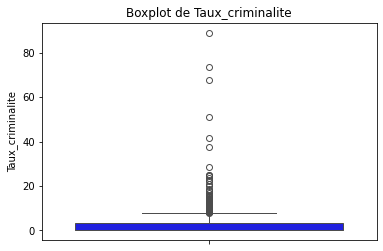

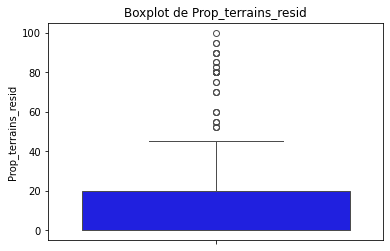

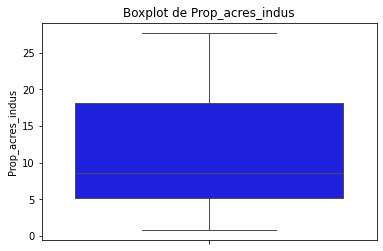

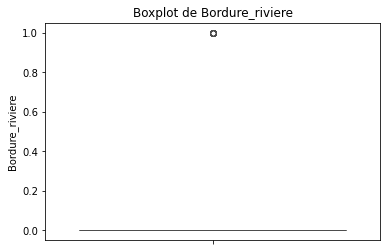

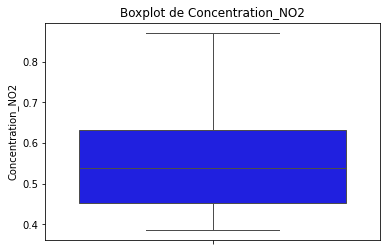

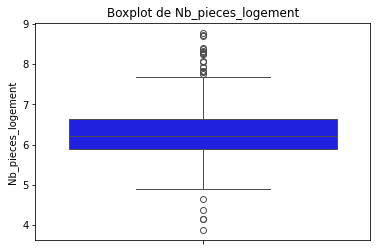

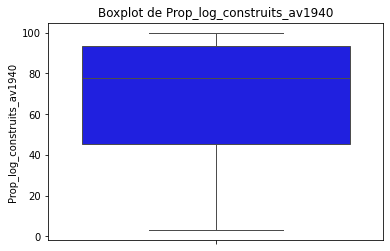

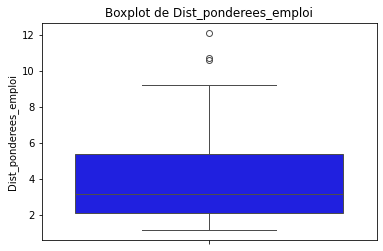

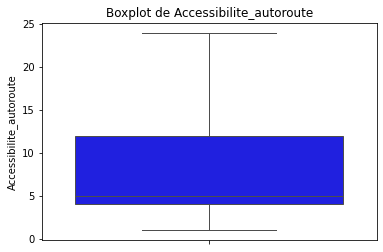

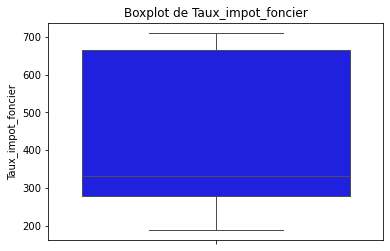

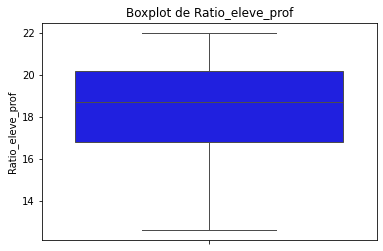

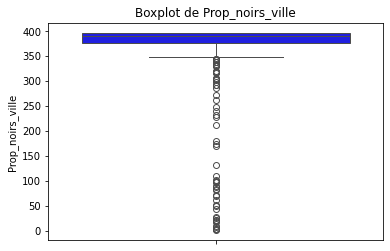

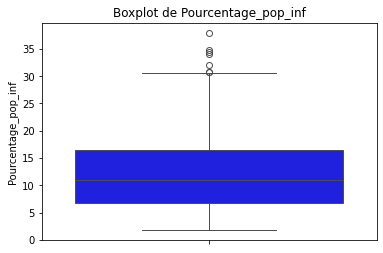

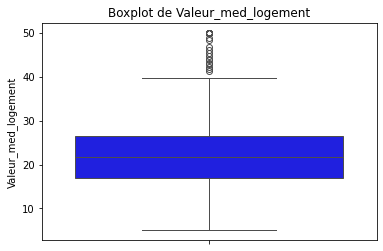

In [57]:

# Affichage des boxplots pour chaque variable numérique
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

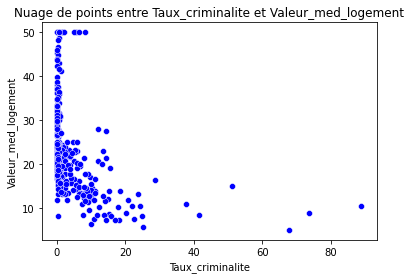

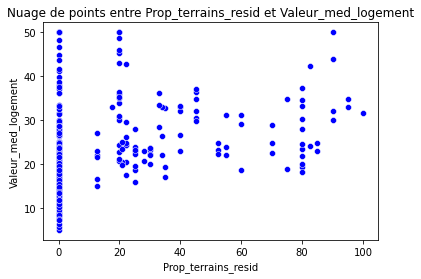

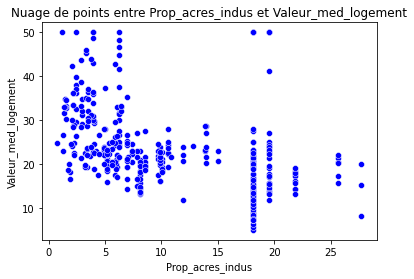

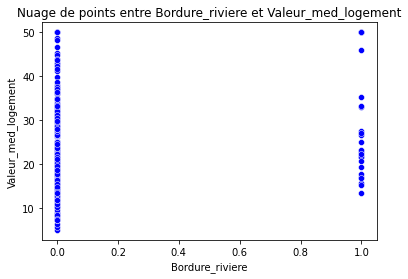

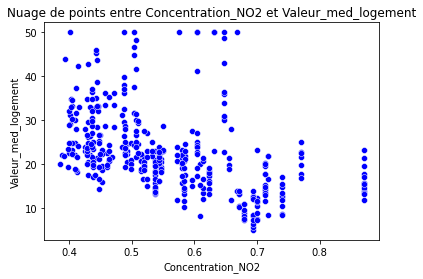

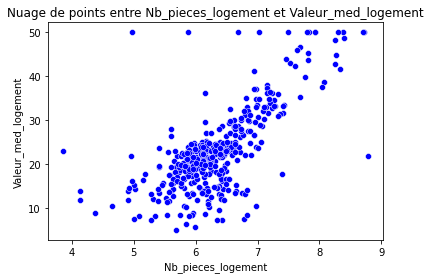

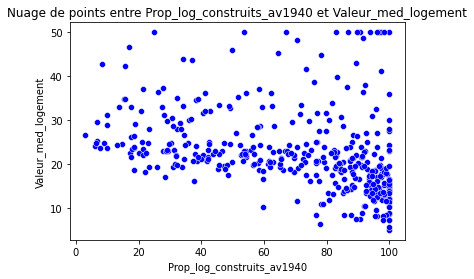

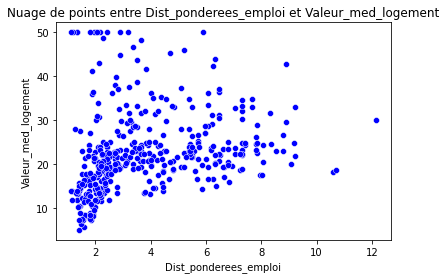

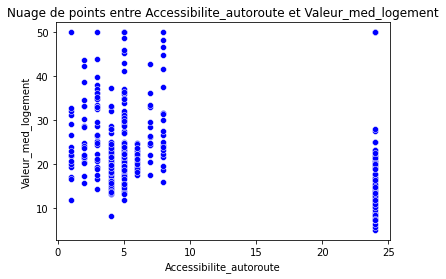

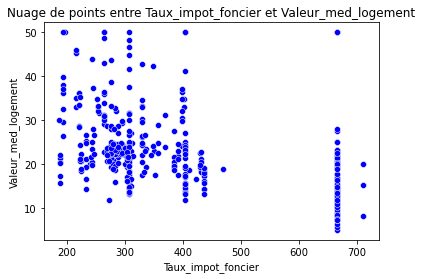

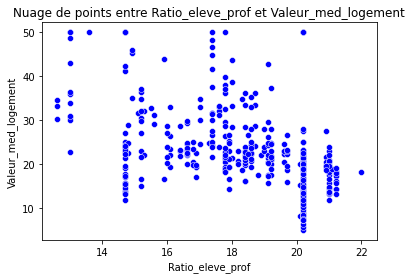

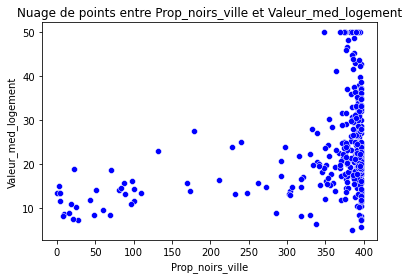

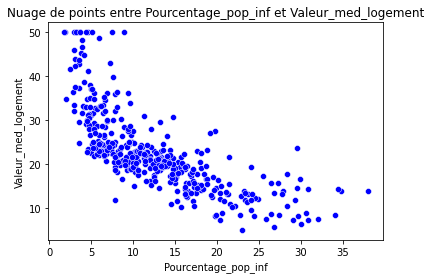

In [58]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
target_col = "Valeur_med_logement"
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

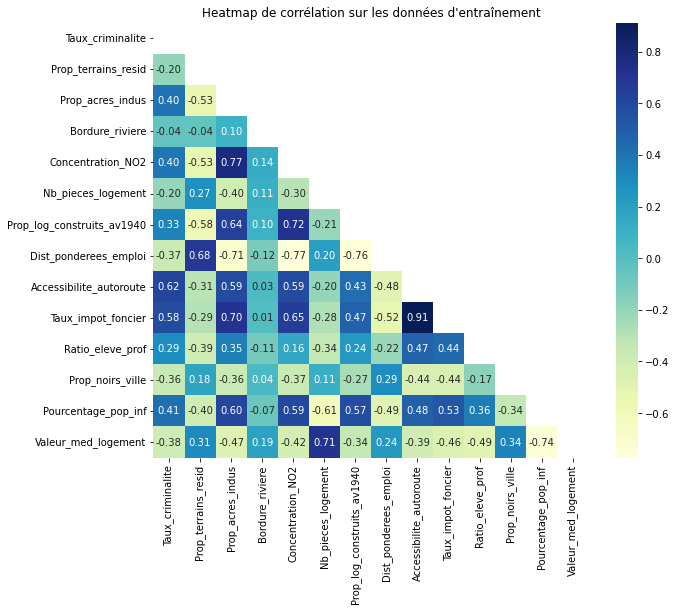

In [59]:
# Calcul de la matrice de corrélation sur les données d'entraînement
corr_matrix_train = train.corr()
# Masquer les valeurs au-dessus de la diagonale principale

mask2 = np.tril(np.ones_like(corr_matrix_train , dtype=bool))
corr_matrix_train_masked = corr_matrix_train .mask(mask2)
#transposée
corr_matrix_train_masked=corr_matrix_train_masked.T

# Afficher la matrice de corrélation de manière triangulaire
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train_masked, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, square=True)
plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()


### Selection des variables à partir de la ocrrélation de pearson

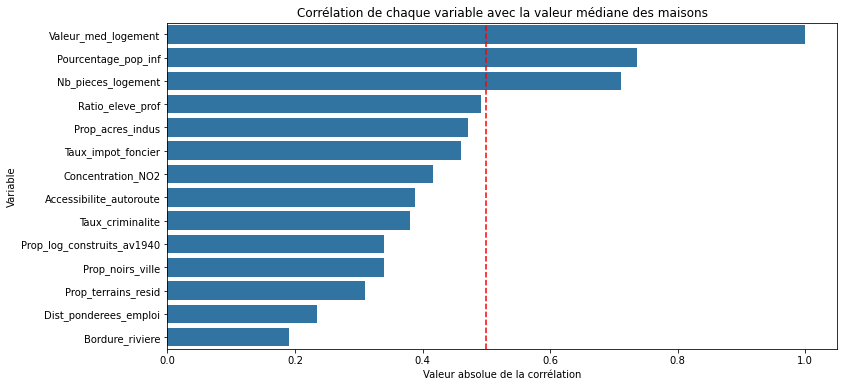

In [61]:

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["Valeur_med_logement"]).sort_values(ascending=False)

seuil =0.5
# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.axvline(x=seuil, color='red', linestyle='--', label='Seuil de corrélation')
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()








In [233]:
var_inte = "Valeur_med_logement"

In [234]:
# Identification des variables au-dessus du seuil
variables_corre_sup_seuil = correlations[correlations > seuil].index.tolist()

# Retirer la variable cible de la liste (si elle est présente)

if var_inte in variables_corre_sup_seuil:
    variables_corre_sup_seuil.remove(var_inte)
    
print("Les variables ayant une corrélation supérieure à", seuil, "avec la variable cible sont :")
for var in variables_corre_sup_seuil:
    print(f"- {var}")



Les variables ayant une corrélation supérieure à 0.5 avec la variable cible sont :
- Pourcentage_pop_inf
- Nb_pieces_logement


In [ ]:
# si on a des var caté

"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def cramers_v(cont_table):
    """Calcule le coefficient V de Cramer pour une table de contingence."""
    chi2 = stats.chi2_contingency(cont_table)[0]
    n = cont_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))

# Supposons que 'data' soit votre DataFrame
cat_vars = data.select_dtypes(include='object').columns.tolist()

# Encodage des variables catégorielles
df = pd.get_dummies(data[cat_vars], drop_first=True)

# Ajout de la variable 'Valeur_med_logement' au DataFrame encodé
df['Valeur_med_logement'] = data['Valeur_med_logement']

# Calcul de l'ANOVA pour chaque variable catégorielle
for col in df.columns:
    if df[col].dtype == 'uint8':
        anova_f, anova_p = stats.f_oneway(df[df[col] == 0]['Valeur_med_logement'], 
                                         df[df[col] == 1]['Valeur_med_logement'])
        print(f"Variable {col}: ANOVA F-stat={anova_f:.2f}, p-value={anova_p:.3f}")

# Calcul du V de Cramer pour les variables catégorielles
cramer_v = {}
for col in df.columns:
    if df[col].dtype == 'uint8':
        cont_table = pd.crosstab(df['Valeur_med_logement'], df[col])
        cramer_v[col] = cramers_v(cont_table)

# Affichage des résultats
plt.figure(figsize=(12, 6))
sns.barplot(x=list(cramer_v.values()), y=list(cramer_v.keys()))
plt.xlabel("Valeur du V de Cramer")
plt.ylabel("Variable")
plt.title("Association entre les variables catégorielles et la valeur médiane des maisons")
plt.show()
"""

# Modélisation sur la base train

In [246]:
#!pip install statsmodels
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement", axis=1)
y_train = train["Valeur_med_logement"]


X_test = test.drop("Valeur_med_logement", axis=1)
y_test = test["Valeur_med_logement"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()



In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculer le VIF pour chaques variables explicative

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

vif




,VIF Factor,features
0,1.987996,Taux_criminalite
1,3.075814,Prop_terrains_resid
2,13.741418,Prop_acres_indus
3,1.181392,Bordure_riviere
4,74.807051,Concentration_NO2
5,77.536575,Nb_pieces_logement
6,20.885660,Prop_log_construits_av1940
7,15.299778,Dist_ponderees_emploi
8,15.204351,Accessibilite_autoroute
9,60.960907,Taux_impot_foncier


In [227]:
# Identification des variables à éliminé
variables_a_eliminer = vif[vif['VIF Factor'] > 10]['features'].tolist()

print("Les variables susceptibles d'être éliminées en raison d'une forte multicolinéarité sont :")
for var in variables_a_eliminer:
    print(f"- {var}")



Les variables susceptibles d'être éliminées en raison d'une forte multicolinéarité sont :
- Prop_acres_indus
- Concentration_NO2
- Nb_pieces_logement
- Prop_log_construits_av1940
- Dist_ponderees_emploi
- Accessibilite_autoroute
- Taux_impot_foncier
- Ratio_eleve_prof
- Prop_noirs_ville
- Pourcentage_pop_inf


In [235]:
# Supprimer les variables fortement correlé avec la target de la liste des variables à éliminer
for var in variables_corre_sup_seuil :
    if var in variables_a_eliminer:
        variables_a_eliminer.remove(var)



In [236]:
variables_a_eliminer

['Prop_acres_indus',
 'Concentration_NO2',
 'Prop_log_construits_av1940',
 'Dist_ponderees_emploi',
 'Accessibilite_autoroute',
 'Taux_impot_foncier',
 'Ratio_eleve_prof',
 'Prop_noirs_ville']

In [228]:
#lr_model.summary2()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


#### interprétation des résultats de cette régression linéaire 

***Constante (const)*** : 

La valeur de la constante est 30,2467, ce qui signifie que lorsque toutes les variables indépendantes sont égales à 0, la valeur moyenne prédite de la variable dépendante est de 30,2467.

***Taux de criminalité (Taux_criminalite)*** : 

Le coefficient est de -0,113056, indiquant qu'une augmentation d'une unité du taux de criminalité est associée à une diminution de 0,113056 unités de la variable dépendante, toutes choses étant égales par ailleurs. La valeur p de 0,001253 indique que cet effet est statistiquement significatif à un seuil de 1%.

***Proportion de terrains résidentiels (Prop_terrains_resid)*** : Le coefficient est de 0,030110, ce qui signifie qu'une augmentation d'une unité de la proportion de terrains résidentiels est associée à une augmentation de 0,030110 unités de la variable dépendante, toutes choses étant égales par ailleurs. Cependant, avec une valeur p de 0,060532, cet effet n'est pas statistiquement significatif à un seuil de 5%.

***Proportion d'acres industriels (Prop_acres_indus)*** : Le coefficient est de 0,040381, indiquant qu'une augmentation d'une unité de la proportion d'acres industriels est associée à une augmentation de 0,040381 unités de la variable dépendante. Néanmoins, avec une valeur p de 0,549233, cet effet n'est pas statistiquement significatif.

Ainsi, les variables ayant un impact statistiquement significatif sont : ***le taux de criminalité, la bordure de rivière, la concentration de NO2, le nombre de pièces du logement, la distance pondérée à l'emploi, l'accessibilité à l'autoroute, le taux d'impôt foncier, le ratio élèves/professeurs et la proportion de population noire***. Les autres variables ne semblent pas avoir d'effet significatif sur la variable dépendante.

# Analyse des coefficients
Lors de l'interprétation d'un modèle de régression linéaire, il est courant de vérifier la significativité des coefficients. En général, la plupart, voire tous, les coefficients sont significatifs au seuil de 10%. De plus, dans notre cas, le coefficient correspondant à l'année de construction est également significatif au seuil de 5%.

En examinant le coefficient du taux de criminalité, on constate qu'il est négatif. Cela signifie que lorsque le taux de criminalité augmente dans une ville, le prix des biens immobiliers (la variable d'intérêt) diminue. Cette observation est cohérente avec l'intuition, car une augmentation du taux de criminalité peut avoir un impact négatif sur la demande de biens immobiliers et donc sur leur prix.


In [238]:
# Identifier les variables statistiquement significatives
alpha = 0.05  # Niveau de significativité souhaité
significant_vars = results_table.loc[results_table['P>|t|'] < alpha].index.tolist()

print("Variables avec un impact statistiquement significatif :")
significant_vars



Variables avec un impact statistiquement significatif :


['const',
 'Taux_criminalite',
 'Bordure_riviere',
 'Concentration_NO2',
 'Nb_pieces_logement',
 'Dist_ponderees_emploi',
 'Accessibilite_autoroute',
 'Taux_impot_foncier',
 'Ratio_eleve_prof',
 'Prop_noirs_ville',
 'Pourcentage_pop_inf']

In [239]:
# Supprimer les variables à eliminer de la liste des variables significatives
for var in variables_a_eliminer :
    if var in significant_vars:
        significant_vars.remove(var)
        


In [240]:
significant_vars

['const',
 'Taux_criminalite',
 'Bordure_riviere',
 'Nb_pieces_logement',
 'Pourcentage_pop_inf']

In [241]:
var_sel = list(significant_vars)
if 'const' in var_sel:
    var_sel.remove('const') # on fait remove au lieu de drop car on a une liste


In [243]:
var_sel

['Taux_criminalite',
 'Bordure_riviere',
 'Nb_pieces_logement',
 'Pourcentage_pop_inf']

In [247]:
"""
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def select_significant_variables(X_train, y_train, model, seuil_cor=0.5, seuil_vif=10, alpha=0.05):
    """
    Sélectionne les variables statistiquement significatives à partir de X_train, y_train et du modèle de régression.
    
    Parameters:
    X_train (pandas.DataFrame): Matrice des variables explicatives.
    y_train (pandas.Series): Variable cible.
    model (sklearn.base.RegressorMixin): Modèle de régression à utiliser.
    seuil_cor (float, optional): Seuil de corrélation pour sélectionner les variables. Défaut à 0.5.
    seuil_vif (float, optional): Seuil de VIF pour identifier les variables à éliminer en raison de multicolinéarité. Défaut à 10.
    alpha (float, optional): Niveau de significativité pour identifier les variables statistiquement significatives. Défaut à 0.05.
    
    Returns:
    list: Liste des variables sélectionnées.
    """
    # Calcul de la corrélation entre chaque variable et la variable cible
    correlations = X_train.corr()[y_train.name].abs().sort_values(ascending=False)
    
    # Identification des variables au-dessus du seuil de corrélation
    variables_corre_sup_seuil = correlations[correlations > seuil_cor].index.tolist()
    
    # Retirer la variable cible de la liste (si elle est présente)
    if y_train.name in variables_corre_sup_seuil:
        variables_corre_sup_seuil.remove(y_train.name)
    
    # Calcul du VIF pour identifier les variables à éliminer en raison de multicolinéarité
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["features"] = X_train.columns
    
    variables_a_eliminer = vif[vif['VIF Factor'] > seuil_vif]['features'].tolist()
    
    # Supprimer les variables fortement corrélées avec la variable cible de la liste des variables à éliminer
    for var in variables_corre_sup_seuil:
        if var in variables_a_eliminer:
            variables_a_eliminer.remove(var)
    
    # Obtenir le tableau de résultats du modèle de régression
    results_table = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficients'])
    results_table['P>|t|'] = [2 * (1 - model.get_params()['random_state'].norm.cdf(abs(x))) for x in model.coef_]
    
    # Identifier les variables statistiquement significatives
    significant_vars = results_table.loc[results_table['P>|t|'] < alpha].index.tolist()
    
    # Supprimer les variables à éliminer de la liste des variables significatives
    for var in variables_a_eliminer:
        if var in significant_vars:
            significant_vars.remove(var)
    
    # Supprimer la constante de la liste des variables sélectionnées
    var_sel = list(significant_vars)
    if 'const' in var_sel:
        var_sel.remove('const')
    
    return var_sel
"""

In [249]:
"""
var_sel = select_significant_variables(X_train, y_train, lr_model)
print("Variables sélectionnées :")
for var in var_sel:
    print(f"- {var}")
    """

'\nvar_sel = select_significant_variables(X_train, y_train, lr_model)\nprint("Variables sélectionnées :")\nfor var in var_sel:\n    print(f"- {var}")\n    '

In [63]:
#Significativité globale du modèle
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.743
1,Dependent Variable:,Valeur_med_logement,AIC:,2416.6443
2,Date:,2024-06-05 13:45,BIC:,2472.6641
3,No. Observations:,404,Log-Likelihood:,-1194.3
4,Df Model:,13,F-statistic:,90.43
5,Df Residuals:,390,Prob (F-statistic):,6.21e-109
6,R-squared:,0.751,Scale:,22.418


#### Analyses
Nous allons maintenant examiner la signification globale du modèle. Le coefficient de détermination (R²) du modèle est de 74%. Étant donné que j'ai inclus la constante dans mon modèle, je peux interpréter le R²  comme le pouvoir explicatif du modèle. Cela signifie que le modèle que j'ai construit explique 75% de la variabilité du phénomène étudié. Plus précisément, ce modèle explique 75% de la variabilité du prix des biens immobiliers à Boston. Cependant, il est important de noter que le R² ajusté est de 74%, ce qui tient compte du nombre de variables explicatives dans le modèle.

En outre, nous avons le test de Fisher pour évaluer la signification globale du modèle. Si la valeur de ce test (Prob (F-statistic))est inférieure à 0,05, cela indique que le modèle est globalement significatif. Dans notre cas, la valeur du test de Fisher est inférieure à 0,05, ce qui confirme que le modèle est globalement significatif.

Cependant, il est essentiel de souligner que toutes ces interprétations reposent sur plusieurs hypothèses du modèle de régression linéaire qui doivent être vérifiées. Il est important de valider ces hypothèses avant de tirer des conclusions définitives à partir du modèle.

In [64]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)




In [250]:

# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)




  Métrique      Train       Test
0       R2   0.750886   0.668759
1      MSE  21.641413  24.291119
2     RMSE   4.652033   4.928602


# Analyse et interpretation 

En examinant les résultats affichés, nous pouvons évaluer la performance du modèle à l'aide des métriques suivantes :

- Coefficient de détermination (R2) :
  - R2 Train : 0,750886
  - R2 Test : 0,668759

Le coefficient de détermination (R2) mesure la proportion de la variance de la variable dépendante (prix des biens immobiliers) expliquée par le modèle. Un R2 élevé indique que le modèle explique une grande partie de la variabilité des données. Dans notre cas, le R2 Train est de 0,750886, ce qui signifie que le modèle explique environ 75% de la variabilité des prix des biens immobiliers dans l'ensemble d'entraînement. Le R2 Test est légèrement inférieur, à 0,668759, ce qui indique que le modèle explique environ 67% de la variabilité des prix des biens immobiliers dans l'ensemble de test.

Ces résultats suggèrent un léger surajustement (overfitting) du modèle, car la performance sur l'ensemble de test est légèrement inférieure à celle sur l'ensemble d'entraînement. Cependant, étant donné que la différence est faible, nous pouvons négliger l'overfitting.

- Erreur quadratique moyenne (MSE) :
  - MSE Train : 21,641413
  - MSE Test : 24,291119

Le MSE mesure l'erreur quadratique moyenne entre les valeurs prédites par le modèle et les valeurs réelles. Plus le MSE est faible, meilleure est la performance du modèle. Dans notre cas, le MSE Train est de 21,641413, ce qui indique une erreur quadratique moyenne de 21,64 pour les données d'entraînement. Le MSE Test est légèrement plus élevé, à 24,291119, ce qui indique une erreur quadratique moyenne de 24,29 pour les données de test.

Encore une fois, nous observons une légère augmentation de l'erreur entre les ensembles d'entraînement et de test, ce qui est cohérent avec la présence d'un surajustement du modèle. Cependant, étant donné que cette augmentation est faible, nous pouvons négliger l'overfitting.

- Erreur quadratique moyenne (RMSE) :
  - RMSE Train : 4,652033
  - RMSE Test : 4,928602

Le RMSE est la racine carrée du MSE et mesure l'erreur moyenne entre les valeurs prédites et les valeurs réelles, exprimée dans la même unité que la variable cible. Plus le RMSE est faible, meilleure est la performance du modèle. Dans notre cas, le RMSE Train est de 4,652033 pour les données d'entraînement, tandis que le RMSE Test est de 4,928602 pour les données de test.

Dans l'ensemble, les résultats indiquent un certain degré de surajustement du modèle, avec une performance légèrement inférieure sur l'ensemble de test par rapport à l'ensemble d'entraînement. Cependant, étant donné que les différences sont faibles, nous pouvons considérer que le modèle présente une bonne généralisation et que l'impact de l'overfitting est négligeable.


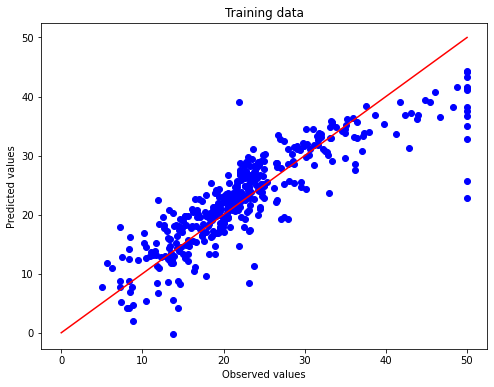

In [67]:

# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()



## Vérification des hypothèses du modèles

### Vérification de l'homoscédasticité

Résultat du test d'homoscédasticité de White:


p-value = 0.000
L'hypothèse d'homoscédasticité est rejetée.


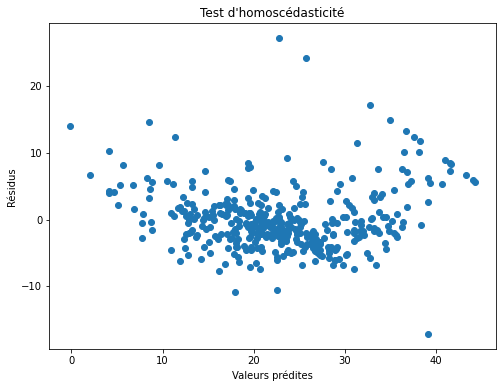

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
from colorama import init, Fore, Back, Style

# Initialisation de colorama
init()

# Calcul des valeurs prédites et des résidus
y_train_pred = lr_model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred

# Test d'homoscédasticité de White
model = ols('residuals ~ y_train_pred', data=pd.DataFrame({'residuals': residuals, 'y_train_pred': y_train_pred})).fit()
white_test = het_white(model.resid, model.model.exog)
white_pvalue = white_test[1]

# Représentation graphique
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')

# Affichage du résultat du test de White
print(f"Résultat du test d'homoscédasticité de White:")
print(f"p-value = {white_pvalue:.3f}")

# Affichage du résultat du test de White

if white_pvalue < 0.05:
    print(f"{Fore.BLACK}{Back.RED}L'hypothèse d'homoscédasticité est rejetée.{Style.RESET_ALL}")
else:
    print(f"{Fore.BLACK}{Back.GREEN}L'hypothèse d'homoscédasticité est vérifiée.{Style.RESET_ALL}")

plt.show()

#### test d'homoscédasticité de White 

Hypothèse nulle et alternative :

Hypothèse nulle (H0) : 
les résidus sont homoscédastiques, c'est-à-dire que la variance des résidus est constante.
Hypothèse alternative (H1) : les résidus sont hétéroscédastiques, c'est-à-dire que la variance des résidus n'est pas constante.

P-value du test :

La p-value indique la probabilité d'observer les données actuelles (ou des données plus extrêmes) sous l'hypothèse nulle.
Si la p-value est inférieure au seuil de significativité choisi (généralement 5% ou 0,05), on rejette l'hypothèse nulle d'homoscédasticité.
Si la p-value est supérieure au seuil de significativité, on ne peut pas rejeter l'hypothèse nulle d'homoscédasticité.

Interprétation des résultats :

Si la p-value est inférieure à 0,05, cela signifie que les résidus sont probablement hétéroscédastiques, c'est-à-dire que leur variance n'est pas constante. Cela viole l'une des hypothèses du modèle de régression linéaire.
Si la p-value est supérieure à 0,05, on ne peut pas rejeter l'hypothèse d'homoscédasticité. Cela signifie que les résidus ont une variance constante, ce qui est conforme à l'une des hypothèses du modèle de régression linéaire.

donc

Si la p-value est inférieure à 0,05, l'hypothèse d'homoscédasticité est rejetée et vous devrez prendre des mesures pour traiter le problème d'hétéroscédasticité, comme utiliser une régression robuste ou une transformation des variables.

Si la p-value est supérieure à 0,05, l'hypothèse d'homoscédasticité est vérifiée et vous pouvez poursuivre l'analyse en supposant que les résidus ont une variance constante.


In [80]:
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model.resid, lr_model.model.exog)
print("Test de Breusch-Pagan : statistique = %f, p-value = %f" % (bp_test[0], bp_test[1]))

Test de Breusch-Pagan : statistique = 59.189087, p-value = 0.000000


### Analyse et interpretation 

Le test de Breusch-Pagan est utilisé pour détecter la présence d'hétéroscédasticité dans les résidus d'un modèle de régression linéaire. Voici l'analyse et l'interprétation des résultats du test de Breusch-Pagan :

La statistique du test de Breusch-Pagan est de 59.189087, ce qui indique la magnitude du test statistique calculé pour évaluer l'hétéroscédasticité. Une statistique plus élevée suggère une plus grande présence d'hétéroscédasticité.

La p-value associée au test est de 0.000000, ce qui est très proche de zéro. La p-value est utilisée pour évaluer la significativité des résultats du test. Dans ce cas, une p-value très faible suggère que les résultats sont très significatifs.

En combinant ces résultats, nous pouvons conclure ce qui suit :

Étant donné que la p-value est extrêmement proche de zéro, nous rejetons l'hypothèse nulle selon laquelle il n'y a pas d'hétéroscédasticité dans les résidus du modèle. Cela indique qu'il y a des preuves solides de l'existence d'une hétéroscédasticité.

La statistique élevée du test confirme également la présence significative de l'hétéroscédasticité dans les résidus.

### Vérification de la multicolinéarité

In [81]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    VIF Factor                    features
0     1.987996            Taux_criminalite
1     3.075814         Prop_terrains_resid
2    13.741418            Prop_acres_indus
3     1.181392             Bordure_riviere
4    74.807051           Concentration_NO2
5    77.536575          Nb_pieces_logement
6    20.885660  Prop_log_construits_av1940
7    15.299778       Dist_ponderees_emploi
8    15.204351     Accessibilite_autoroute
9    60.960907          Taux_impot_foncier
10   81.228153            Ratio_eleve_prof
11   19.703235            Prop_noirs_ville
12   10.597205         Pourcentage_pop_inf


#### Analyse et interpretation 

Certains facteurs VIF élevés (supérieurs à 10) suggèrent une forte corrélation entre certaines variables du modèle. Cela peut indiquer la présence de multicollinéarité, ce qui peut rendre l'interprétation des coefficients de régression moins fiable. Il peut être nécessaire de prendre des mesures pour traiter la multicollinéarité, telles que la suppression de certaines variables ou l'utilisation de techniques d'estimation spécifiques pour gérer ce problème.


## Tester d'autres modèles

In [55]:
train.columns

Index(['Taux_criminalite', 'Prop_terrains_resid', 'Prop_acres_indus',
       'Bordure_riviere', 'Concentration_NO2', 'Nb_pieces_logement',
       'Prop_log_construits_av1940', 'Dist_ponderees_emploi',
       'Accessibilite_autoroute', 'Taux_impot_foncier', 'Ratio_eleve_prof',
       'Prop_noirs_ville', 'Pourcentage_pop_inf', 'Valeur_med_logement'],
      dtype='object')

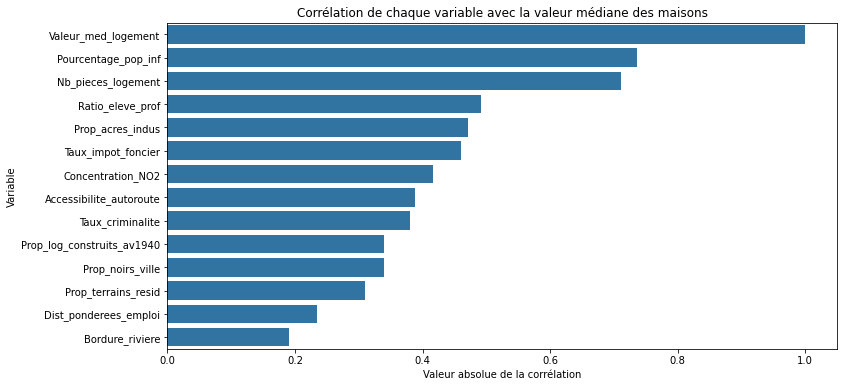

In [82]:
# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()




In [269]:
# Sélection des variables
new_selection = ['Taux_criminalite', 'Prop_terrains_resid', 'Bordure_riviere', 'Pourcentage_pop_inf', 'Nb_pieces_logement']
#new_selection = var_sel
train_selectedb = train[new_selection]
train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]

# Sélection des variables pour le jeu de test
test_selectedb = test[new_selection]
test_selectedb["Valeur_med_logement"] = test["Valeur_med_logement"]


/tmp/ipykernel_176195/3538669408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]
/tmp/ipykernel_176195/3538669408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_selectedb["Valeur_med_logement"] = test["Valeur_med_logement"]


In [270]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_trainb = train_selectedb.drop(var_inte, axis=1)
y_trainb = train_selectedb[var_inte]

X_testb = test_selectedb.drop(var_inte, axis=1)
y_testb = test_selectedb[var_inte]



In [271]:
# Fit du modèle linéaire
lr_modelb = sm.OLS(y_trainb, sm.add_constant(X_trainb)).fit()

# Obtention du tableau de résultats
results_tableb = lr_modelb.summary2().tables[1]
results_tableb


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.456849,3.443081,-1.294436,1.962652e-01,-11.225747,2.312049
Taux_criminalite,-0.120726,0.033224,-3.633660,3.160255e-04,-0.186042,-0.055409
Prop_terrains_resid,0.003962,0.012645,0.313352,7.541775e-01,-0.020897,0.028821
Bordure_riviere,3.973362,1.044607,3.803690,1.649393e-04,1.919724,6.027000
Pourcentage_pop_inf,-0.556914,0.053248,-10.458859,8.813015e-23,-0.661596,-0.452231
Nb_pieces_logement,5.430066,0.480523,11.300332,7.177379e-26,4.485386,6.374746


#### interpretation 


Constante (const) : 

La valeur du coefficient de la constante est de -4.456849, ce qui signifie que lorsque toutes les autres variables prédictives sont égales à 0, la valeur moyenne prédite de la variable cible "Valeur_med_logement" est de -4.456849. Cependant, la p-value associée à ce coefficient est de 0.196, ce qui indique que ce coefficient n'est pas statistiquement significatif au seuil de 5%.

Taux_criminalite : 

Le coefficient de cette variable est de -0.120726, ce qui signifie que lorsque le taux de criminalité augmente de 1 unité, la valeur moyenne prédite de "Valeur_med_logement" diminue de 0.120726 unités, toutes choses étant égales par ailleurs. La p-value associée à ce coefficient est de 0.000316, indiquant que ce coefficient est statistiquement significatif au seuil de 5%.

Prop_terrains_resid :

Le coefficient de cette variable est de 0.003962, ce qui signifie que lorsque la proportion de terrains résidentiels augmente de 1 unité, la valeur moyenne prédite de "Valeur_med_logement" augmente de 0.003962 unités, toutes choses étant égales par ailleurs. Cependant, la p-value associée à ce coefficient est de 0.754, indiquant que ce coefficient n'est pas statistiquement significatif au seuil de 5%.

Bordure_riviere : 
Le coefficient de cette variable est de 3.973362, ce qui signifie que lorsque la propriété est en bordure de rivière, la valeur moyenne prédite de "Valeur_med_logement" augmente de 3.973362 unités, toutes choses étant égales par ailleurs. La p-value associée à ce coefficient est de 0.000165, indiquant que ce coefficient est statistiquement significatif au seuil de 5%.

Pourcentage_pop_inf : 

Le coefficient de cette variable est de -0.556914, ce qui signifie que lorsque le pourcentage de la population à faible revenu augmente de 1 unité, la valeur moyenne prédite de "Valeur_med_logement" diminue de 0.556914 unités, toutes choses étant égales par ailleurs. La p-value associée à ce coefficient est de 8.813e-23, indiquant que ce coefficient est statistiquement très significatif.

Nb_pieces_logement : 

Le coefficient de cette variable est de 5.430066, ce qui signifie que lorsque le nombre de pièces du logement augmente d'une unité, la valeur moyenne prédite de "Valeur_med_logement" augmente de 5.430066 unités, toutes choses étant égales par ailleurs. La p-value associée à ce coefficient est de 7.177e-26, indiquant que ce coefficient est également très statistiquement significatif.

En résumé, les variables "Taux_criminalite", "Bordure_riviere", "Pourcentage_pop_inf" et "Nb_pieces_logement" semblent avoir un impact statistiquement significatif sur la valeur moyenne prédite de "Valeur_med_logement", tandis que la variable "Prop_terrains_resid" n'a pas d'effet significatif.


In [272]:
lr_modelb.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.669
1,Dependent Variable:,Valeur_med_logement,AIC:,2509.9140
2,Date:,2024-06-06 22:38,BIC:,2533.9225
3,No. Observations:,404,Log-Likelihood:,-1249.0
4,Df Model:,5,F-statistic:,164.2
5,Df Residuals:,398,Prob (F-statistic):,2.14e-94
6,R-squared:,0.674,Scale:,28.790


Coefficient de détermination (R²) : Comparez le R² de chaque modèle. Le R² indique la proportion de la variance de la variable dépendante qui est expliquée par le modèle. Plus le R² est élevé, meilleur est le modèle.

Significativité globale du modèle : Comparez la significativité globale du modèle, typiquement à l'aide du test F. Cela vous indique si le modèle dans son ensemble est significatif.

Significativité des coefficients : Comparez la significativité des coefficients de chaque variable explicative à l'aide du test t de Student. Cela vous indique quelles variables sont significatives dans chaque modèle.

Critères d'information : Vous pouvez également comparer des critères d'information comme l'AIC (Akaike Information Criterion) ou le BIC (Bayesian Information Criterion). Ces critères permettent de comparer la qualité relative des modèles en tenant compte du nombre de variables.

Prédictions et erreur de prédiction : Vous pouvez comparer les prédictions des deux modèles sur un jeu de données de test et évaluer leur erreur de prédiction (RMSE, MAE, etc). Le modèle avec la plus faible erreur de prédiction sera généralement préférable.

In [273]:
vifb = pd.DataFrame()
vifb["VIF Factor"] = [variance_inflation_factor(X_trainb.values, i) for i in range(X_trainb.shape[1])]
vifb["features"] = X_trainb.columns
print(vifb)

   VIF Factor             features
0    1.404903     Taux_criminalite
1    1.496354  Prop_terrains_resid
2    1.096236      Bordure_riviere
3    4.377823  Pourcentage_pop_inf
4    4.809735   Nb_pieces_logement


In [274]:
# Ajouter une constante à X_trainb et X_testb
import statsmodels.api as sm
X_trainb_const = sm.add_constant(X_trainb)
X_testb_const = sm.add_constant(X_testb)

# Obtention des prédictions
y_train_predb = lr_modelb.predict(X_trainb_const)
y_test_predb = lr_modelb.predict(X_testb_const)

# Calcul des métriques d'évaluation
r2_trainb = r2_score(y_trainb, y_train_predb)
r2_testb = r2_score(y_testb, y_test_predb)
mse_trainb = mean_squared_error(y_trainb, y_train_predb)
mse_testb = mean_squared_error(y_testb, y_test_predb)
rmse_trainb = np.sqrt(mse_trainb)
rmse_testb = np.sqrt(mse_testb)

In [276]:
# Construction du tableau de résultats

df_metricsb = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_trainb, mse_trainb, rmse_trainb],
    'Test': [r2_testb, mse_testb, rmse_testb]
})
df_metricsb



,Métrique,Train,Test
0,R2,0.673516,0.577085
1,MSE,28.362802,31.013971
2,RMSE,5.325674,5.569019


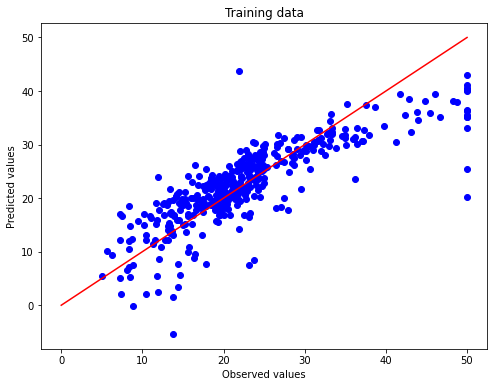

In [277]:


# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_trainb, y_train_predb, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()

## comparaison des deux models


In [278]:
# Détermination du meilleur modèle
if r2_testb > r2_test:
    print(f"Avec un r2 de {r2_testb} le modèle lr_modelb est le meilleur.")
elif r2_testb < r2_test:
    print(f"Avec un r2 de {r2_test} le modèle lr_model est le meilleur.")
else:
    print("\nLes deux modèles ont des performances similaires.")

Avec un r2 de 0.6687594935356308 le modèle lr_model est le meilleur.


### Vérification de la normalité

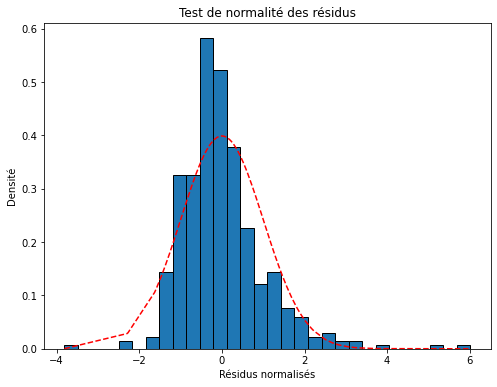

In [92]:
import scipy.stats as stats
# Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
plt.hist(resid_norm, bins=30, density=True, edgecolor='black')
plt.plot(np.sort(resid_norm), stats.norm.pdf(np.sort(resid_norm)), 'r--')
plt.title('Test de normalité des résidus')
plt.xlabel('Résidus normalisés')
plt.ylabel('Densité')
plt.show()

#### remarques

Forme de l'histogramme :

Si l'histogramme des résidus normalisés suit une forme de cloche symétrique, c'est un bon signe que les résidus suivent une distribution normale.
Si l'histogramme est asymétrique, étalé ou présente des queues épaisses, cela peut indiquer que les résidus ne suivent pas une distribution normale.

Comparaison avec la courbe de densité normale :

Si la courbe de densité normale (en rouge pointillé) s'ajuste bien à l'histogramme, cela suggère que les résidus suivent une distribution normale.
Si la courbe de densité normale s'écarte significativement de l'histogramme, cela indique que les résidus ne suivent probablement pas une distribution normale.

Interprétation générale :

Si les résidus suivent une distribution normale, cela signifie que les hypothèses du modèle de régression linéaire sont respectées, ce qui renforce la validité du modèle.
Si les résidus ne suivent pas une distribution normale, cela peut indiquer la présence de problèmes dans le modèle, comme des observations aberrantes, de l'hétéroscédasticité ou d'autres violations des hypothèses. Dans ce cas, des transformations des variables ou des analyses complémentaires peuvent être nécessaires.

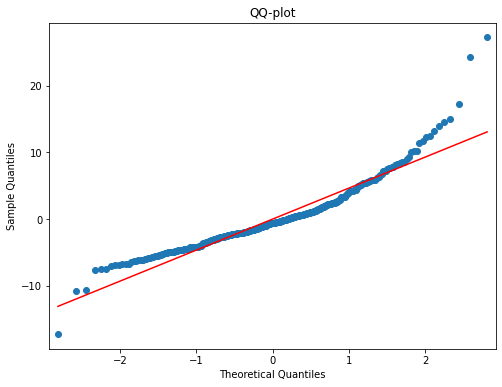

In [93]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

#### REmarques 
Pour interpréter le graphique du QQ-plot des résidus, voici les principales choses à regarder :

1. **Alignement des points sur la ligne de référence** :
   - Si les points sont bien alignés le long de la ligne de référence (la ligne droite), cela indique que la distribution des résidus suit bien une distribution normale.
   - Si les points s'écartent significativement de la ligne de référence, cela suggère que la distribution des résidus n'est pas normale.

2. **Forme de la distribution des points** :
   - Si les points forment une ligne droite, c'est un bon signe de normalité.
   - Si les points forment une courbe concave ou convexe, cela indique que la distribution n'est pas parfaitement normale.
   - Si les points ont tendance à s'écarter de la ligne de référence dans les queues de distribution (début et fin du graphique), cela peut signifier que les résidus ont des queues plus épaisses que celles d'une distribution normale.

3. **Symétrie de la distribution** :
   - Si la distribution des points est symétrique par rapport à la ligne de référence, c'est un bon indicateur de normalité.
   - Si la distribution est asymétrique, cela suggère que les résidus ne suivent pas une loi normale.

4. **Comparaison aux attentes** :
   - Si vous vous attendiez à ce que les résidus suivent une distribution normale, un QQ-plot s'écartant significativement de la ligne de référence indique que cette hypothèse n'est pas vérifiée.
   - Si vous aviez des doutes sur la normalité des résidus, un QQ-plot aligné sur la ligne de référence peut confirmer que cette hypothèse est raisonnable.

En résumé, un QQ-plot bien aligné sur la ligne de référence avec une distribution symétrique des points est un bon signe que les résidus suivent une loi normale. À l'inverse, un QQ-plot s'écartant de la ligne de référence indique que cette hypothèse n'est probablement pas respectée et qu'il faudra envisager d'autres analyses ou transformations des variables.

In [98]:
import scipy.stats as stats
import pandas as pd

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Ajouter la colonne "significativité"
df_normality['Significativité'] = ['Non significatif' if df_normality.loc[i, 'p-value'] != 'N/A' and df_normality.loc[i, 'p-value'] > 0.05 else 'Significatif' for i in range(len(df_normality))]

# Afficher le tableau
print(df_normality)

    Test de normalité  Statistique p-value Significativité
0        Shapiro-Wilk     0.911794     0.0    Significatif
1    Anderson-Darling     7.412841     N/A    Significatif
2  Kolmogorov-Smirnov     0.347848     0.0    Significatif


In [99]:
# Interprétation des résultats
print('\nInterprétation des résultats :')

# Test de Shapiro-Wilk
if df_normality.loc[0, 'p-value'] > 0.05:
    print('Le test de Shapiro-Wilk suggère que les résidus suivent une distribution normale.')
else:
    print('Le test de Shapiro-Wilk suggère que les résidus ne suivent pas une distribution normale.')

# Test d'Anderson-Darling
print('Le test d\'Anderson-Darling indique que la statistique de test est', df_normality.loc[1, 'Statistique'])
print('Il faut comparer cette valeur à des valeurs critiques tabulées pour déterminer si les résidus suivent une distribution normale.')

# Test de Kolmogorov-Smirnov
if df_normality.loc[2, 'p-value'] > 0.05:
    print('Le test de Kolmogorov-Smirnov suggère que les résidus suivent une distribution normale.')
else:
    print('Le test de Kolmogorov-Smirnov suggère que les résidus ne suivent pas une distribution normale.')

# Conclusion globale
if 'Non significatif' in df_normality['Significativité'].values:
    print('\nGlobalement, les tests suggèrent que les résidus suivent une distribution normale.')
else:
    print('\nGlobalement, les tests suggèrent que les résidus ne suivent pas une distribution normale.')


Interprétation des résultats :
Le test de Shapiro-Wilk suggère que les résidus ne suivent pas une distribution normale.
Le test d'Anderson-Darling indique que la statistique de test est 7.412840863462691
Il faut comparer cette valeur à des valeurs critiques tabulées pour déterminer si les résidus suivent une distribution normale.
Le test de Kolmogorov-Smirnov suggère que les résidus ne suivent pas une distribution normale.

Globalement, les tests suggèrent que les résidus ne suivent pas une distribution normale.


### Vérification de l'autocorrélation

In [100]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 2.114123


In [101]:
# Test de Durbin-Watson
if 1.5 <= dw_test <= 2.5:
    print('Le test de Durbin-Watson suggère qu\'il n\'y a pas d\'autocorrélation des résidus.')
elif dw_test < 1.5:
    print('Le test de Durbin-Watson suggère qu\'il y a une autocorrélation positive des résidus.')
else:
    print('Le test de Durbin-Watson suggère qu\'il y a une autocorrélation négative des résidus.')

Le test de Durbin-Watson suggère qu'il n'y a pas d'autocorrélation des résidus.


In [279]:
"""
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train_selected1, y_train_selected1)
lasso_model.fit(X_train_selected1, y_train_selected1)
enet_model.fit(X_train_selected1, y_train_selected1)

# Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train_selected1)
ridge_test_pred = ridge_model.predict(X_test_selected1)
lasso_train_pred = lasso_model.predict(X_train_selected1)
lasso_test_pred = lasso_model.predict(X_test_selected1)
enet_train_pred = enet_model.predict(X_train_selected1)
enet_test_pred = enet_model.predict(X_test_selected1)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train_selected1, ridge_train_pred)
ridge_test_r2 = r2_score(y_test_selected1, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, ridge_test_pred))
lasso_train_r2 = r2_score(y_train_selected1, lasso_train_pred)
lasso_test_r2 = r2_score(y_test_selected1, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, lasso_test_pred))
enet_train_r2 = r2_score(y_train_selected1, enet_train_pred)
enet_test_r2 = r2_score(y_test_selected1, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train_selected1, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test_selected1, enet_test_pred))


data_metrics = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df_metrics = pd.DataFrame(data_metrics)
df_metrics
"""




"\n# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée\nridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)\nlasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)\nenet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)\n\n# Ajuster les modèles aux données d'apprentissage\nridge_model.fit(X_train_selected1, y_train_selected1)\nlasso_model.fit(X_train_selected1, y_train_selected1)\nenet_model.fit(X_train_selected1, y_train_selected1)\n\n# Prédire les valeurs pour les données d'apprentissage et de test\nridge_train_pred = ridge_model.predict(X_train_selected1)\nridge_test_pred = ridge_model.predict(X_test_selected1)\nlasso_train_pred = lasso_model.predict(X_train_selected1)\nlasso_test_pred = lasso_model.predict(X_test_selected1)\nenet_train_pred = enet_model.predict(X_train_selected1)\nenet_test_pred = enet_model.predict(X_test_selected1)\n\n# Calculer le R2 et le RMSE pour les données d'apprenti

##### Autres modeles

In [282]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'ElasticNet': ElasticNet(random_state=42)
}

def evaluate_model(y_true, y_pred, return_score=False):
    mse = mean_squared_error(y_true, y_pred)
    if return_score:
        return mse
    else:
        print(f'Mean Squared Error: {mse:.2f}')

def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f'{name}:')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        evaluate_model(y_test, y_pred)
        print('-' * 30)

train_test_eval(models, X_train, y_train, X_test, y_test)

LinearRegression:
Mean Squared Error: 24.29
------------------------------
RandomForestRegressor:
Mean Squared Error: 7.90
------------------------------
DecisionTreeRegressor:
Mean Squared Error: 10.42
------------------------------
ElasticNet:
Mean Squared Error: 23.97
------------------------------




1. **LinearRegression**
   - La valeur de l'erreur quadratique moyenne (MSE) est de 24.29.
   - Cette valeur relativement élevée indique que le modèle de régression linéaire simple ne s'ajuste pas très bien aux données de test. Cela suggère que les relations entre les variables explicatives et la variable cible sont probablement non linéaires.

2. **RandomForestRegressor**
   - La valeur de MSE est de 7.90.
   - C'est nettement inférieur à la régression linéaire, ce qui montre que le modèle de forêt aléatoire est beaucoup plus performant sur ces données.
   - Les forêts aléatoires sont capables de capturer des relations non linéaires complexes, ce qui explique leur meilleure performance par rapport au modèle de régression linéaire.

3. **DecisionTreeRegressor**
   - La valeur de MSE est de 10.42.
   - C'est également mieux que la régression linéaire, mais moins performant que la forêt aléatoire.
   - Les arbres de décision ont tendance à être plus sensibles au surapprentissage que les forêts aléatoires, ce qui peut expliquer leurs performances légèrement inférieures.

4. **ElasticNet**
   - La valeur de MSE est de 23.97.
   - Ce résultat est très proche de celui de la régression linéaire simple (24.29).
   - Cela indique que le modèle Elastic Net, qui combine la régression linéaire et des termes de pénalisation, n'apporte pas d'amélioration significative par rapport à la régression linéaire sur ces données.

En résumé, le modèle de forêt aléatoire semble être le plus performant sur ces données, avec une erreur quadratique moyenne beaucoup plus faible que les autres modèles. Cela suggère que les relations entre les variables sont effectivement de nature non linéaire, ce que les forêts aléatoires gèrent mieux que la régression linéaire ou l'Elastic Net.

#### Remarque 



LinearRegression

Il s'agit du modèle de régression linéaire simple, sans aucun paramètre de régularisation.
La valeur de l'erreur quadratique moyenne (MSE) affichée représente la performance de ce modèle sur les données de test.
Plus la valeur de MSE est faible, mieux le modèle de régression linéaire s'adapte aux données.


RandomForestRegressor

Il s'agit du modèle de forêt aléatoire de régression.
La valeur de MSE affichée représente la performance de ce modèle sur les données de test.
Les forêts aléatoires sont généralement plus performantes que les modèles de régression linéaire simples, car elles peuvent capturer des relations non linéaires dans les données.


DecisionTreeRegressor

Il s'agit du modèle d'arbre de régression.
La valeur de MSE affichée représente la performance de ce modèle sur les données de test.
Les arbres de régression peuvent également capturer des relations non linéaires, mais ils sont plus sensibles au surapprentissage que les forêts aléatoires.


ElasticNet

Il s'agit du modèle de régression Elastic Net, qui combine la régression linéaire avec une pénalité de type Lasso et Ridge.
La valeur de MSE affichée représente la performance de ce modèle sur les données de test.
L'Elastic Net peut être plus performant que la régression linéaire simple lorsque les données présentent de la multicolinéarité ou lorsque le nombre de variables explicatives est important par rapport à la taille de l'échantillon.


En comparant les performances des différents modèles, vous pourrez déterminer lequel est le plus adapté à votre problème de régression spécifique. Généralement, les modèles plus complexes comme les forêts aléatoires et l'Elastic Net sont plus performants que la régression linéaire simple, 

In [ ]:
# Deployement
import pickle
# Enregistrement du modèle
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(lr_modelb, file)
